# 4.9 Part 2 - Intro to Data Visualization with Python

#### 1. import libraries

#### 2. Bar charts

#### 3. Histograms

#### 4. Line chart with sampling data

#### 5. Task step 3 Histogram 'order_hour_of_day'

#### 6. Task step 4 Bar chart from loyalty flag

#### 7. Task step 5 Line chart difference in expenditure (the “prices” column) depending on the hour of the day

#### 8. Task step 7 Scatter plot of connection between age and spending power (income)

#### 9. Task step 8 Export all visualizations in png format


## 1.

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
#set scripts path in variable 'path'
path = r'/Users/constantinmelachrinos/Documents/careerfoundry data analyst/Course files/Data Analytics Immersion/Achievement 4 - InstaCart - Python/Instacart Basket Analysis'

#import Instacart data_sets
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_combined.pkl'))

# 2. Bar Charts

<Axes: xlabel='orders_day_of_week'>

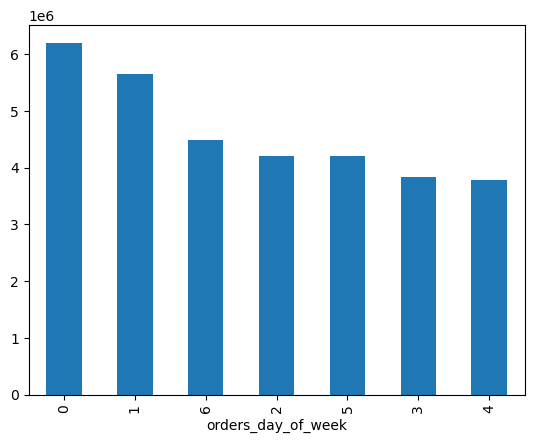

In [7]:
#creating bar chart for orders_day_of_week
ords_prods_cust['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

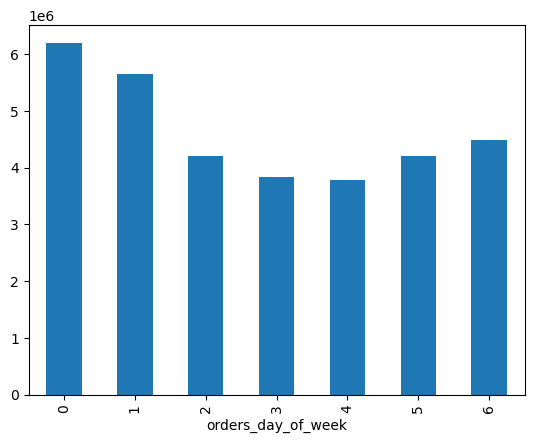

In [8]:
# bar chart with sorted by days number
ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

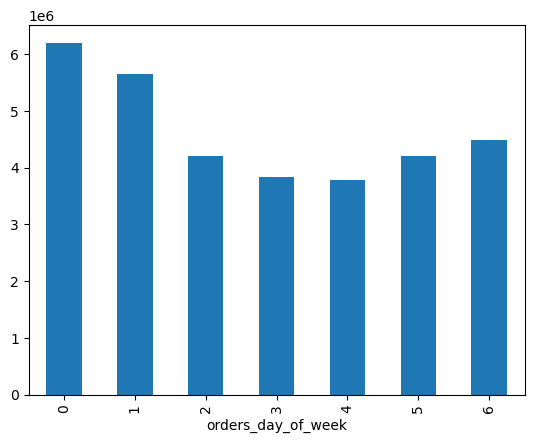

In [9]:
#save bar chart in bar variable so it can be saved later on
bar=ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [10]:
# save bar chart as png file in the visualizations folder
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 3. Histograms

<Axes: ylabel='Frequency'>

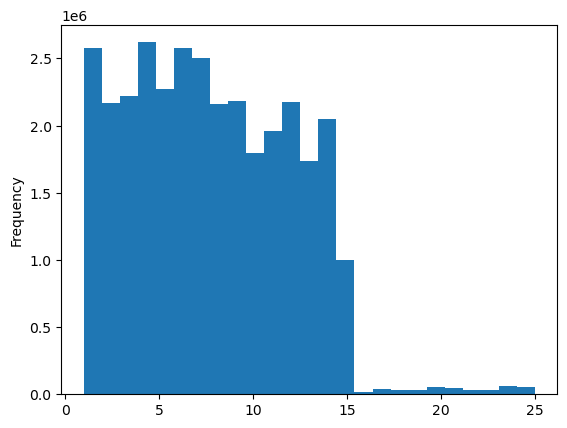

In [11]:
#create histogram of the price column
ords_prods_cust['prices'].plot.hist(bins = 25)

In [12]:
ords_prods_cust['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

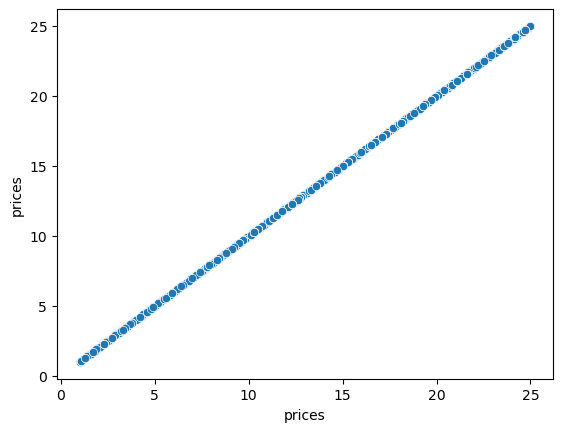

In [13]:
# investigate the odd price distribution with scatterplots
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust)

In [14]:
# check for the number of out of range prices
ords_prods_cust['prices'].loc[ords_prods_cust['prices'] > 100]

Series([], Name: prices, dtype: float64)

In [15]:
# replace these prices with NaN values
ords_prods_cust.loc[ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [16]:
#check if executed correctly
ords_prods_cust['prices'].max()

25.0

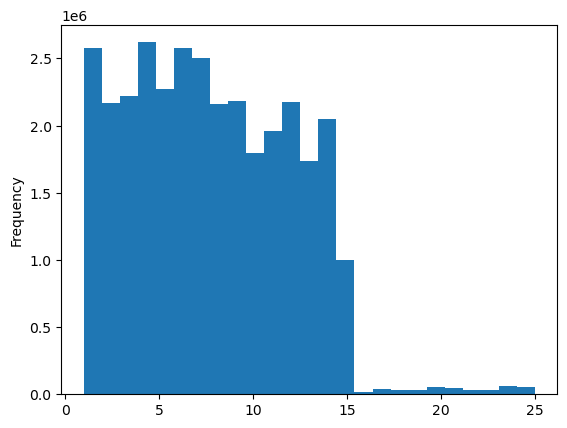

In [17]:
#create histogram of the price column
hist=ords_prods_cust['prices'].plot.hist(bins = 25)

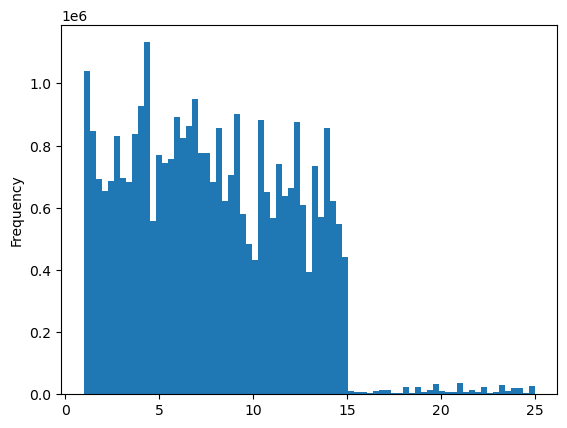

In [18]:
#create histogram of the price column with 75 bins to increase resolution
hist=ords_prods_cust['prices'].plot.hist(bins = 75)

In [19]:
# save histogram as png file in the visualizations folder
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price_freq.png'))

# 4. Line chart with sampling data

In [20]:
#create a list that holds true and false values to test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [21]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [22]:
# store 70% of the dataframe in big
big = ords_prods_cust[dev]

In [23]:
# store 30% of the dataframe in small
small = ords_prods_cust[~dev]

In [24]:
# check rows count of whole dataframe
len(ords_prods_cust)

32404859

In [25]:
# check length of big and small dataframe part
len(small) + len(big)

32404859

In [26]:
df_2 = small[['orders_day_of_week','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


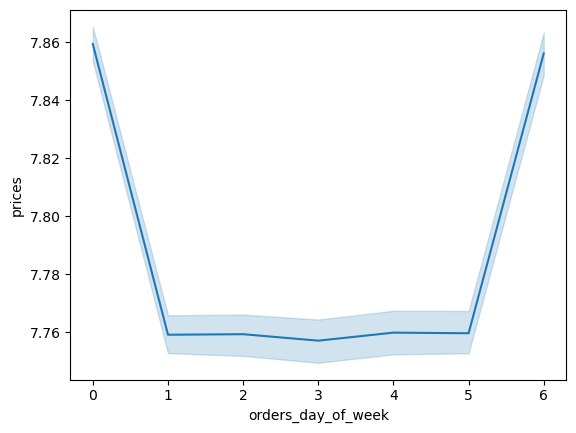

In [27]:
# create line chart of the sample data frame small
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [28]:
# save line chart as png file in the visualizations folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_orders_dow.png'))

# 5. Task step 3 Histogram 'order_hour_of_day'

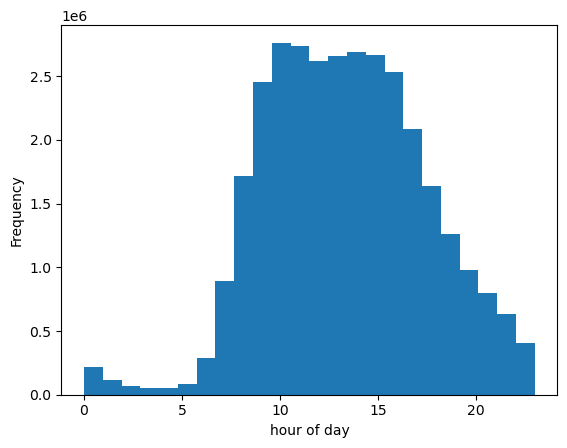

In [29]:
#create histogram of 'order_hour_of_day'
hist_ord_hod=ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24, xlabel='hour of day')

#### As we can see in the histogram orders in the middle of the night are very rare. Orders start to pick at around 7 in the morning and have their peak at around 9 and this situation holds till around 16 hours. After that it declines continuesly.

# 6. Task step 4 Bar chart from loyalty flag

In [30]:
#check column names of dataframe
ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices', 'spending_behaviour', 'median_days_since_prior_order',
       'order_behaviour', 'first_name', 'last_name', 'gender', 'state', 'age',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

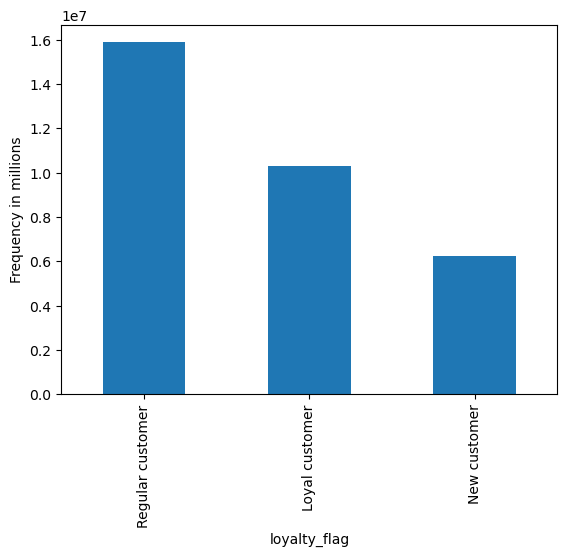

In [31]:
#creating bar chart from loyalty flag
bar_loyalty=ords_prods_cust['loyalty_flag'].value_counts().plot.bar(ylabel='Frequency in millions')

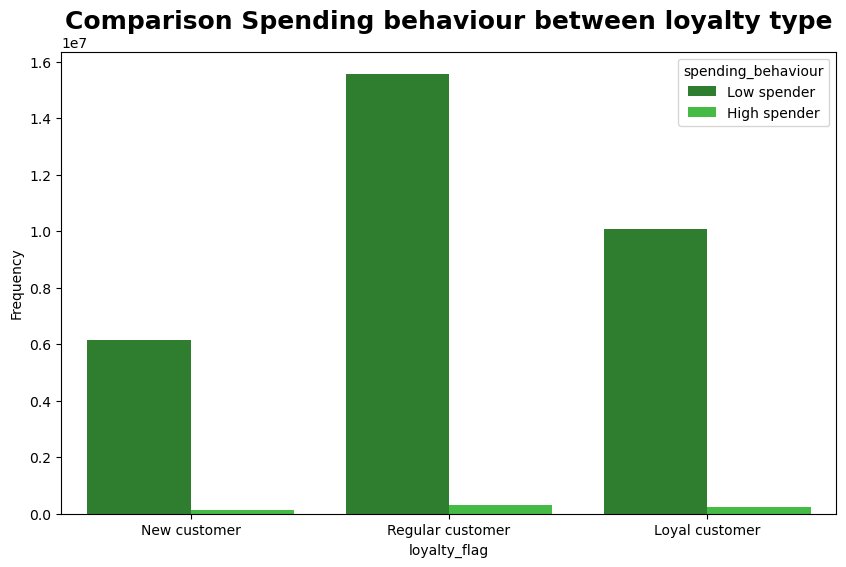

In [32]:
#create bar chart with comparison of loyalty and spending behaviour

plt.figure(figsize=(10, 6))
# define Seaborn color palette to use 
palette_color = ['#228B22','#32CD32','#90EE90']
#define column chart
bar_comp_age=sns.countplot(x = 'loyalty_flag', 
            hue = 'spending_behaviour',
            data = ords_prods_cust, 
            palette=palette_color)
bar_comp_age.set(
            ylabel='Frequency')
plt.title('Comparison Spending behaviour between loyalty type', weight='bold').set_fontsize('18')
#export visualization
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_spending.png'))

# 7. Task step 5 Line chart difference in expenditure (the “prices” column) depending on the hour of the day

### Since i alrady have saved the 30% part of the dataframe in the variable small above i will use this variable to just look at the two viable columns 'prices' and 'order_hour_of_day'

In [34]:
#write sample with the viable columns in a new variable
df_sample_diff_exp = small[['order_hour_of_day','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


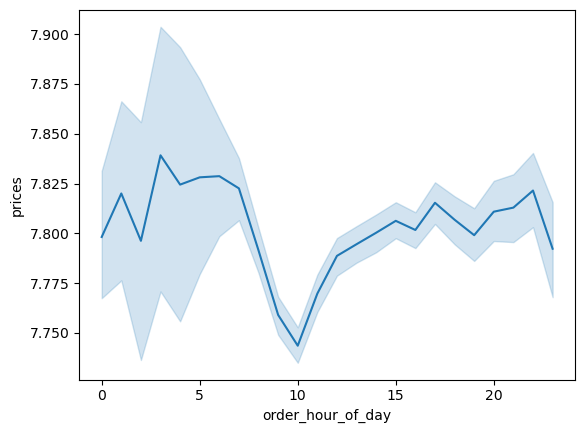

In [37]:
# create line chart of the sample data frame
line_diff_exp = sns.lineplot(data = df_sample_diff_exp, x = 'order_hour_of_day',y = 'prices')

# 7. Task step 6 Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [38]:
#write sample with the viable columns in a new variable
df_sample_age_ndep = small[['age','n_dependants']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


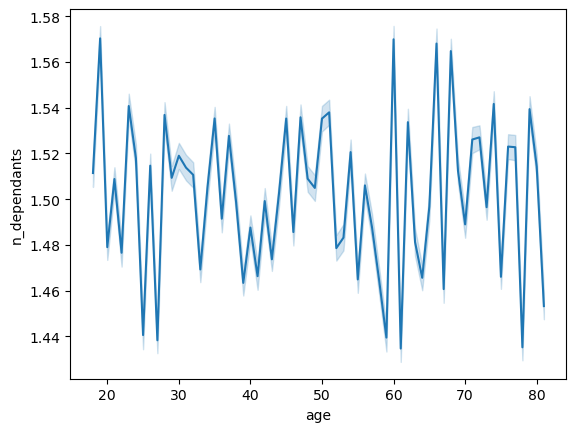

In [39]:
# create line chart of the sample data frame
line_age_ndep = sns.lineplot(data = df_sample_age_ndep, x = 'age',y = 'n_dependants')

#### There is no real pattern to see but what i could figure out is that there are some peaks in the age groups 60-70 and around 20. 

# 8. Task step 7 Scatter plot of connection between age and spending power (income)

In [47]:
#write sample with the viable columns in a new variable
df_sample_age_income = small[['age','income','gender']]

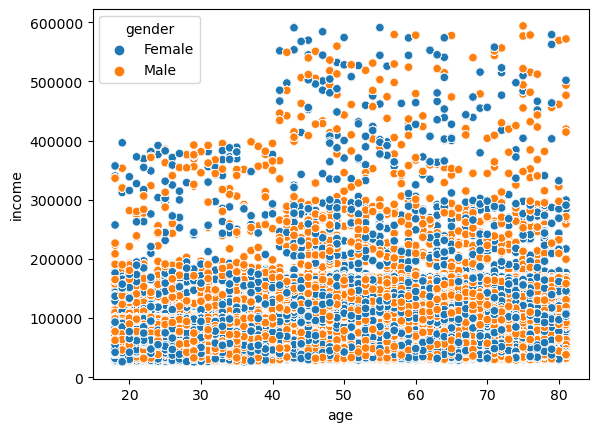

In [48]:
# investigate the connection between 'age' and 'income' columns
scatter_age_income=sns.scatterplot(x = 'age', y = 'income',data = df_sample_age_income,hue='gender')

#### as i can see from the scatterplot above is that around age 40 the income makes a big leap up. Meaning customers over 40 earn more and as a result have more spending power.

# 9. Task step 8 Export all visualizations in png format

In [52]:
# export histogram 'order_hour_of_day'
hist_ord_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [55]:
# export bar chart loyalty flag
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [56]:
# export line chart difference in expenditure
line_diff_exp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_difference_expenditure.png'))

In [57]:
# export line chart age and dependants
line_age_ndep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [58]:
# export line age and income
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))